# Predecir las enfermedades cardiacas usando machine learning

Este notebook introduce conceptos fundamentales de machine learning y ciencia de datos mediante el problema de **clasificación** de enfermedad cardiaca.

Dado un conjunto de características de salud de una persona, construiremos un modelo para predecir si presenta o no enfermedad cardiaca.

El objetivo es mostrar un ejemplo de extremo a extremo de cómo podría verse un **proof of concept** en ciencia de datos y machine learning.

## ¿Qué es la clasificación?

La clasificación consiste en decidir si una muestra pertenece a una clase u otra (**clasificación binaria**).

Si existen múltiples opciones de clase, hablamos de **clasificación multiclase**.

## Qué obtendremos

Comenzaremos con el dataset de enfermedad cardiaca usado en módulos anteriores y abordaremos el problema siguiendo el marco de modelado en machine learning.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework-tools.png?raw=true" width=500/> |
|:--:|
| Marco de Modelado de Machine Learning en 6 Pasos |

Más específicamente, revisaremos los siguientes temas:

| Paso | Contenido |
|:-----|:----------|
| **Análisis exploratorio de datos (EDA)** | Examinar el dataset para comprenderlo mejor. |
| **Entrenamiento de modelos** | Crear uno o varios modelos que aprendan a predecir una variable objetivo. |
| **Evaluación de modelos** | Evaluar las predicciones mediante métricas específicas del problema. |
| **Comparación de modelos** | Comparar distintos modelos para encontrar el mejor. |
| **Ajuste de hiperparámetros** | Mejorar un modelo ajustando sus hiperparámetros. |
| **Importancia de características** | Identificar qué variables aportan más a la predicción. |
| **Validación cruzada** | Verificar si un buen modelo también funciona con datos no vistos. |
| **Reporte de resultados** | Preparar cómo presentar los hallazgos. |

Para desarrollar estos puntos utilizaremos pandas, Matplotlib y NumPy para análisis de datos, y Scikit-Learn para las tareas de machine learning.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> |
|:--:|
| Herramientas utilizadas en cada paso del proceso de modelado. |

Al finalizar, dispondremos de varios modelos capaces de predecir con buena precisión si una persona tiene enfermedad cardiaca basándose en diferentes parámetros.

También podrás identificar cuáles de esos parámetros aportan más al diagnóstico; por ejemplo, el sexo podría ser más relevante que la edad.

## 1. Recorriendo el marco de Machine Learning en 6 pasos

### 1.1 Definición del problema

En este caso, el problema a abordar es una **clasificación binaria** (cada muestra solo puede pertenecer a una de dos clases).

Usaremos diversas **características** (información clínica o de salud) de una persona para predecir si presenta enfermedad cardiaca o no.

En una frase:

*Dado un conjunto de parámetros clínicos de un paciente, ¿podemos predecir si tiene enfermedad cardiaca?*

### 1.2 ¿Qué datos estamos utilizando?

Aquí corresponde revisar en detalle los datos sobre los que se basa la definición del problema.

Esto puede incluir obtener el dataset (si no existe previamente), definir parámetros, consultar a expertos y entender qué valores esperar.

Los datos originales provienen de la [base de datos de Cleveland](https://archive.ics.uci.edu/dataset/45/heart+disease) del UCI Machine Learning Repository.

Sin embargo, utilizaremos una versión ya formateada disponible en [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

La base original contiene 76 atributos, pero aquí solo usaremos 14. Los **atributos** (o **features**) son las variables que utilizaremos para predecir nuestra **variable objetivo**.

Los atributos o features también se conocen como **variables independientes**, mientras que la variable objetivo se denomina **variable dependiente**.

> **Nota:** Las variables independientes se usan para predecir la(s) variable(s) dependiente(s).

En nuestro caso, las variables independientes son los distintos parámetros médicos del paciente y la variable dependiente es si presenta o no enfermedad cardiaca.

### 1.3 ¿Cómo evaluaremos nuestro modelo?

Una métrica de evaluación suele definirse al inicio de un proyecto.

Sin embargo, como el machine learning es altamente experimental, esta métrica puede ajustarse con el tiempo.

Para comenzar, podrías plantear algo como:

*Si durante el proof of concept logramos un 95% de precisión al predecir si un paciente tiene enfermedad cardiaca, continuaremos con el proyecto.*

Esto es útil porque establece un objetivo inicial hacia el cual puede trabajar el científico de datos o ingeniero de machine learning.


### 1.4 ¿Qué características del dataset serán importantes para nosotros?

Las *features* son las distintas partes o características de los datos.

En este paso conviene explorar qué representa cada variable y generar una referencia que puedas consultar más adelante.

Una de las formas más comunes de hacerlo es crear un **diccionario de datos**.

#### Diccionario de Datos del Dataset de Enfermedad Cardiaca

Un diccionario de datos describe las variables con las que estás trabajando.

No todos los datasets incluyen uno, por lo que es posible que debas investigarlo o consultar a un **experto en la materia** (alguien que conozca el dominio).

A continuación se muestran las *features* que utilizaremos para predecir nuestra variable objetivo (presencia o ausencia de enfermedad cardiaca).

| Feature  | Descripción | Ejemplos |
|:---------|:------------|:---------|
| **age** | Edad en años | 29, 45, 60 |
| **sex** | 1 = hombre; 0 = mujer | 0, 1 |
| **cp**  | Tipo de dolor torácico | 0: Angina típica, 1: Angina atípica, 2: Dolor no anginoso, 3: Asintomático |
| **trestbps** | Presión arterial en reposo (mm Hg al ingreso) | 120, 140, 150 |
| **chol** | Colesterol sérico en mg/dl | 180, 220, 250 |
| **fbs** | Glucosa en ayunas > 120 mg/dl (1 = sí; 0 = no) | 0, 1 |
| **restecg** | Resultados del electrocardiograma en reposo | 0: Normal, 1: Anomalía ST-T, 2: Hipertrofia ventricular izquierda |
| **thalach** | Frecuencia cardíaca máxima alcanzada | 160, 180, 190 |
| **exang** | Angina inducida por ejercicio (1 = sí; 0 = no) | 0, 1 |
| **oldpeak** | Depresión del ST inducida por ejercicio respecto al reposo | 0.5, 1.0, 2.0 |
| **slope** | Pendiente del segmento ST en el pico del ejercicio | 0: Ascendente, 1: Plana, 2: Descendente |
| **ca** | Número de vasos principales (0–3) coloreados por fluoroscopia | 0, 1, 2, 3 |
| **thal** | Resultado del test con talio | 1: Normal, 3: Normal, 6: Defecto fijo, 7: Defecto reversible |
| **target** | Presencia de enfermedad (1 = sí; 0 = no) | 0, 1 |

> **Nota:** El dataset no contiene información personal identificable (PII).

Es recomendable guardar este diccionario en una variable de Python o en un archivo externo para consultarlo más adelante sin volver a esta sección.


## 2. Preparando las herramientas

Al inicio de cualquier proyecto es común ver todas las librerías necesarias importadas en un solo bloque (como se muestra en la celda de código siguiente).

Sin embargo, en la práctica, cuando comienzas un proyecto nuevo es habitual ir importando librerías a medida que las necesitas (porque al principio no sabes exactamente cuáles requerirás).

Después de trabajar un par de horas en el problema, probablemente quieras ordenar el código.  
En ese momento suele ser útil reunir todas las librerías utilizadas al inicio del notebook.

Las librerías que uses variarán según el proyecto, pero hay algunas que serán útiles en casi cualquier trabajo con datos estructurados:

* [pandas](https://pandas.pydata.org/) para análisis de datos.  
* [NumPy](https://numpy.org/) para operaciones numéricas.  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
* [Matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/) para gráficos y visualización.  
* [Scikit-Learn](https://scikit-learn.org/stable/) para modelado y evaluación en machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For plots inside the notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploración de Datos (Exploratory Data Analysis o EDA)

El objetivo aquí es conocer mejor el dataset y convertirte en alguien que domina su contenido.

1. ¿Qué pregunta(s) estás intentando responder?  
2. ¿Qué tipo de datos tenemos y cómo debemos tratarlos según su naturaleza?  
3. ¿Qué falta en el dataset y cómo deberíamos manejar esos valores faltantes?  
4. ¿Dónde están los outliers y por qué importa identificarlos?  
5. ¿Cómo puedes agregar, modificar o eliminar características para obtener más valor del análisis?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Cuantos de cada clase hay aqui
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

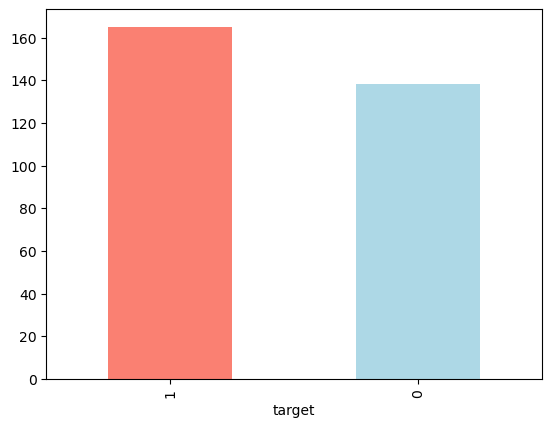

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Habrán valores nulos?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de enfermedades cardiacas por sexo

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Comparemos la columna target con la columna sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

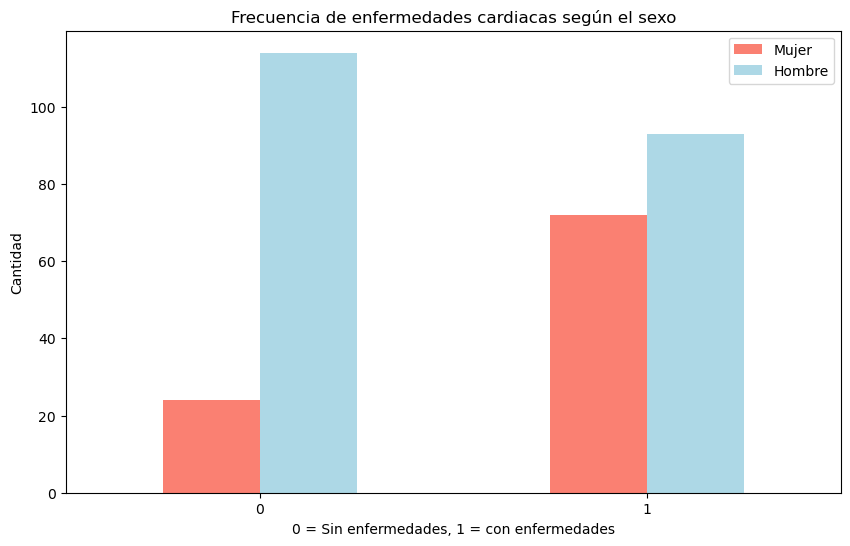

In [12]:
#Crear una grafica para la matriz de confusión

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])

plt.title("Frecuencia de enfermedades cardiacas según el sexo")
plt.xlabel("0 = Sin enfermedades, 1 = con enfermedades")
plt.ylabel("Cantidad")
plt.legend(["Mujer","Hombre"])
plt.xticks(rotation=0)

### Edad vs Maximo ritmo cardiaco por enfermedad cardiaca

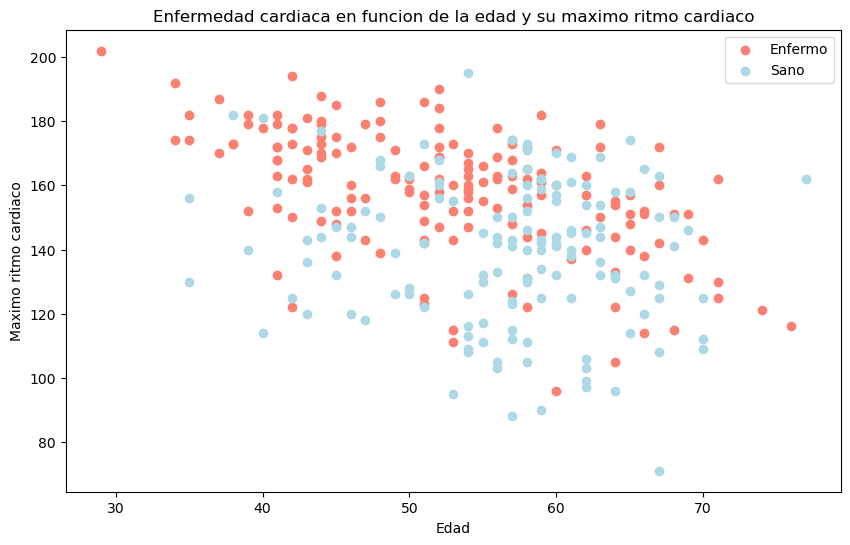

In [13]:

plt.figure(figsize=(10, 6))


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Enfermedad cardiaca en funcion de la edad y su maximo ritmo cardiaco")
plt.xlabel("Edad")
plt.ylabel("Maximo ritmo cardiaco")
plt.legend(["Enfermo", "Sano"]);

#### Revisaremos la distribución de las edades con un histograma

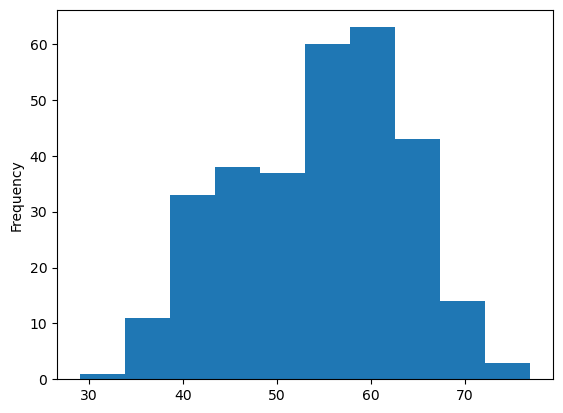

In [14]:
df.age.plot.hist();

### Frecuencia de Enfermedad Cardiaca por Tipo de Dolor Torácico

3. **cp** – Tipo de dolor torácico  
   * **0: Angina típica** — dolor torácico asociado a una disminución del flujo sanguíneo al corazón.  
   * **1: Angina atípica** — dolor torácico no relacionado con el corazón.  
   * **2: Dolor no anginoso** — típicamente espasmos esofágicos (no relacionado con el corazón).  
   * **3: Asintomático** — dolor torácico que no presenta signos de enfermedad.

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


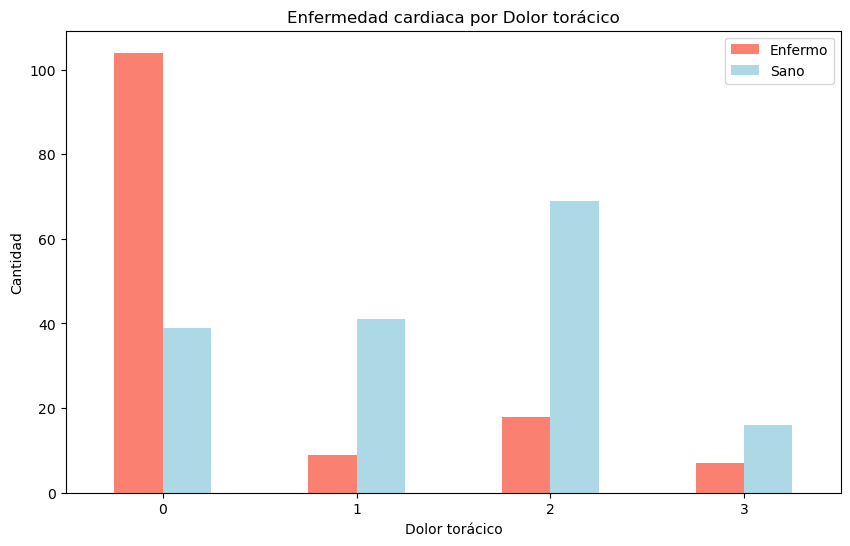

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Enfermedad cardiaca por Dolor torácico")
plt.xlabel("Dolor torácico")
plt.ylabel("Cantidad")
plt.legend(["Enfermo", "Sano"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Implementación de una matriz de correlación

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Arreglo de la matrix de correlación para hacerla visualmente mas atractiva

(14.5, -0.5)

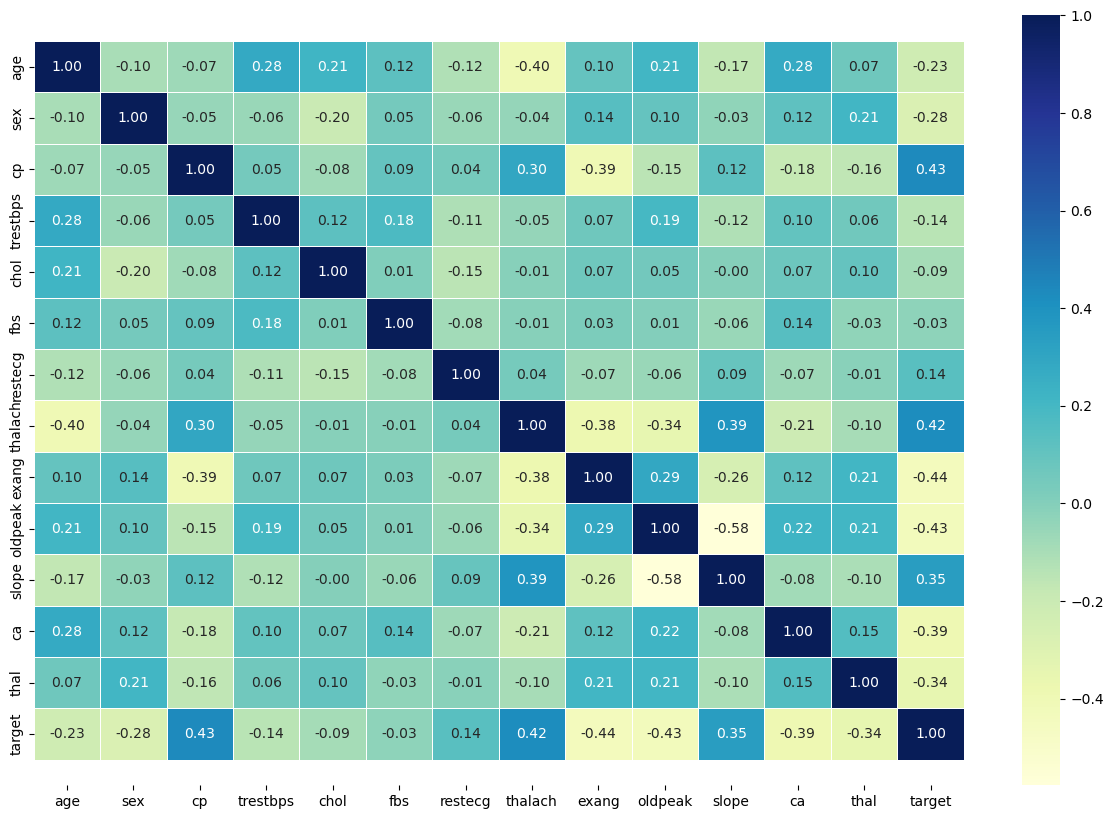

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

## 5. Modelando

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Separar los datos en un eje X y un eje Y

In [21]:
X = df.drop("target", axis=1)

y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Separar los datos en datos de entrenamientos y datos de prueba

In [24]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Ahora que tenemos nuestros datos divididos en conjuntos de entrenamiento y prueba, es momento de construir un modelo de machine learning.

Entrenaremos el modelo (para que aprenda los patrones) usando el conjunto de entrenamiento.

Y lo probaremos (aplicará los patrones aprendidos) usando el conjunto de prueba.

Vamos a probar 3 modelos de machine learning:

- **Regresión Logística**  
- **K-Nearest Neighbours (KNN) Classifier**  
- **Random Forest Classifier**


In [27]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [28]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # le hace un fit del modelo a los datos
        model.fit(X_train, y_train)
        # Evalua el modelo e inserta su puntuación en model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Usuario\Desktop\project1ztm\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comparación de modelos

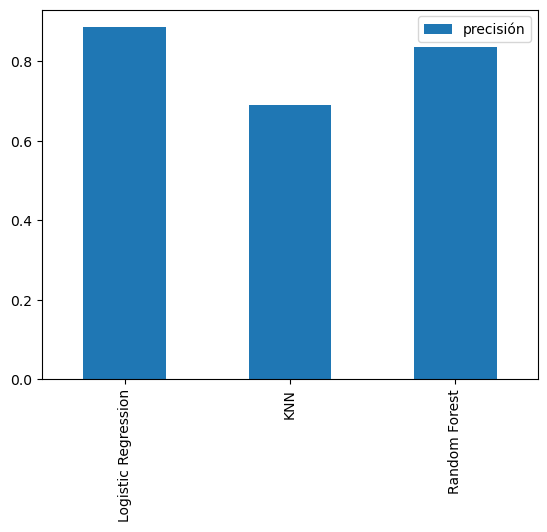

In [30]:
model_compare = pd.DataFrame(model_scores, index=["precisión"])
model_compare.T.plot.bar();

Ahora que tenemos un modelo base… y sabemos que las primeras predicciones de un modelo no siempre deben guiar nuestros siguientes pasos, ¿qué deberíamos hacer?

Revisemos lo siguiente:  
* Ajuste de hiperparámetros  
* Importancia de las características  
* Matriz de confusión  
* Validación cruzada  
* Precisión (Precision)  
* Exhaustividad (Recall)  
* Puntaje F1 (F1 score)  
* Reporte de clasificación  
* Curva ROC  
* Área bajo la curva (AUC)  

### Ajuste de hiperparámetros (manual)

In [31]:
# Ajustemos  KKN

train_scores= []
test_scores=[]

# Crear una lista de diferentes valores por n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


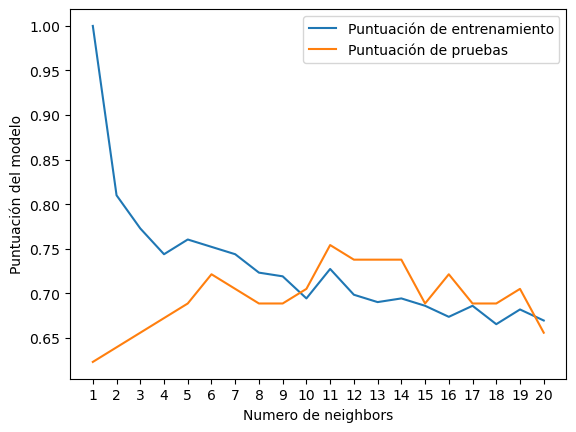

In [34]:
plt.plot(neighbors, train_scores, label="Puntuación de entrenamiento")
plt.plot(neighbors, test_scores, label="Puntuación de pruebas")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Numero de neighbors")
plt.ylabel("Puntuación del modelo")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")



### Ajustando los hiperparametros con RandomizedSearchCV

vamos a ajustar los hiperparametros usando:
- LogisticRegression()
- RandomForestClassifier()

.. usando RandomizedSearchCV

Crearemos un diccionario para LogisticRegression()

In [35]:
log_reg_grid= {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

Crearemos un diccionario para RandomForestClassifier()

In [36]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Ahora que tenemos los diccionarios de los hiperparametros para cada uno de los modelos ajustaremos cada uno usando RandomizedSearchCV...

Ajustaremos LogisticRegression()

In [37]:
np.random.seed(42)

Ajustaremos los parametros aleatorios de la busqueda para LogisticRegression()

In [38]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

Le haremos un fit random a los hiperparametros del modelo de busqueda para LogisticRegression

In [39]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Ahora que ajustamos LogisticRegression(), haremos lo mismo para RandomForestClassifier()

Ajustaremos las seeds y los hiperparametros aleatorios para RandomForestClassifier

In [42]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

Le haremos un fit aleatorio de hiperparametros al modelo de busqueda para RandomForestClassifier()

In [43]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


Busacremos los mejores hiperparametros

In [44]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

Evaluaremos randomizedsearchCV para el modelop RandomForestClassifier 

In [45]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Ajustes de hiperparametros con GridSearchCV

Dado que nuestro modelo de **Regresión Logística** ha obtenido los mejores resultados hasta ahora, intentaremos mejorarlo nuevamente utilizando **GridSearchCV**…


Ajustando nuevos hiperparametros para nuestro modelo de regresión logística:

In [46]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

Ajustando un diccionario de hiperparametros de busqueda para regresión logística:

In [47]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose= True)

Implementar el fit de nuestro diccionario con los hiperparametros de nuestro modelo de busqueda

In [48]:
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


Revisando los mejores hiperparametros

In [49]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

Evaluando el modelo con sus hiperparametros

In [50]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluando nuestro clasificador de machine learning ajustado, más allá de la exactitud

* Curva ROC y puntaje AUC  
* Matriz de confusión  
* Reporte de clasificación  
* Precisión  
* Recall  
* F1-score  

… y sería ideal utilizar validación cruzada siempre que sea posible.

Para comparar y evaluar nuestro modelo entrenado, primero necesitamos generar predicciones.


Hagamos las predicciones con el modelo ajustado

In [51]:
y_preds = gs_log_reg.predict(X_test)

In [52]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Graficaremos la curva ROC y calcularemos el puntaje AUC

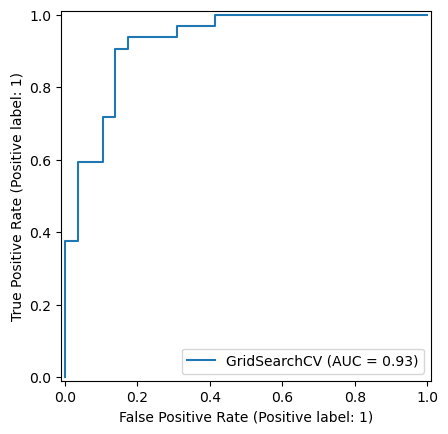

In [54]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

Implementaremos la matriz de confusión de forma atractiva para el cliente

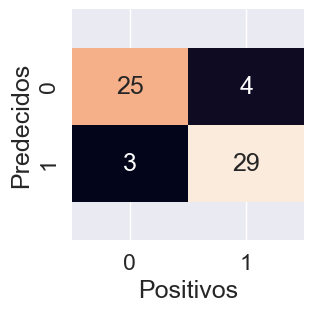

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar= False)
    plt.xlabel("Positivos")
    plt.ylabel("Predecidos")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

Ahora que tenemos una curva ROC, una métrica AUC y una matriz de confusión, obtengamos también un reporte de clasificación, así como precisión, recall y f1-score con validación cruzada.

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calcular métricas de evaluación usando validación cruzada

Vamos a calcular la exactitud (accuracy), precisión, recall y f1-score de nuestro modelo utilizando validación cruzada, y para ello usaremos `cross_val_score()`.



Revisaremos los mejores parametros

In [57]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

Crearemos un nuevo clasificador con los mejores parametros

In [58]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

La precision de validación cruzada

In [59]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [62]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [63]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [64]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

Visualización de las metricas de validación cruzada:

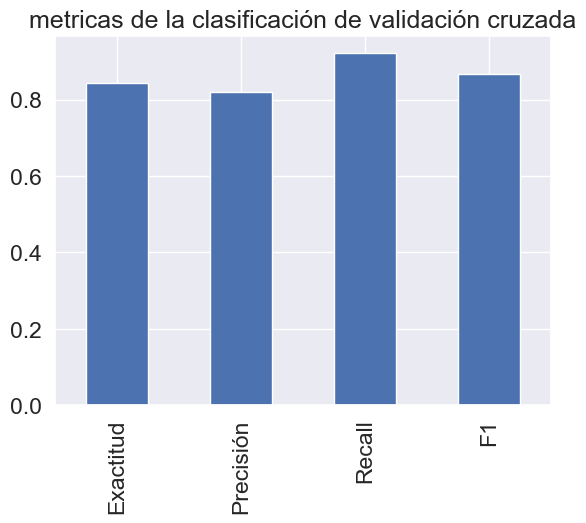

In [66]:
cv_metrics = pd.DataFrame({"Exactitud": cv_acc,
                           "Precisión": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="metricas de la clasificación de validación cruzada",
                      legend=False);

## 8. Feature Importance

Feature importance busca responder: **“¿Qué características aportan más a las predicciones del modelo?”**

En nuestro caso —predecir enfermedad cardíaca a partir de características médicas de pacientes— obtener la importancia de las variables equivale a preguntar:  
**“¿Qué características influyen más en que el modelo determine si una persona tiene o no enfermedad cardíaca?”**

Dado que cada modelo aprende patrones de manera distinta, también difiere la forma en que evalúa qué características son más relevantes.  
Por lo tanto, la importancia de características puede variar significativamente entre distintos algoritmos.

Para ver cómo se calcula para cada tipo de modelo, normalmente basta revisar la documentación de Scikit-Learn o buscar algo como:  
**“NOMBRE_DEL_MODELO feature importance”**  
por ejemplo: *“random forest feature importance”*.

Como estamos usando **`LogisticRegression`**, veremos una forma de obtener su importancia de características.  
Para ello utilizaremos el atributo **`coef_`**, que según la [documentación oficial de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), corresponde a los coeficientes de las características en_)**_**


In [67]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [68]:
# revisar el coeficiente
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


A primera vista, esto puede no tener mucho sentido. Pero estos valores representan cuánto contribuye cada característica a que el modelo decida si los patrones en los datos de salud de un paciente se inclinan más hacia tener enfermedad cardíaca o no.

Aun así, en su forma actual, este arreglo `coef_` sigue sin ser muy interpretable.  
Pero empezará a serlo cuando lo combinemos con las columnas (features) de nuestro dataframe.

In [70]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.003167280425913024),
 'sex': np.float64(-0.8604465017405314),
 'cp': np.float64(0.6606704375815468),
 'trestbps': np.float64(-0.011569931400895204),
 'chol': np.float64(-0.0016637445504085657),
 'fbs': np.float64(0.04386110683275644),
 'restecg': np.float64(0.3127584216723769),
 'thalach': np.float64(0.024593614040407018),
 'exang': np.float64(-0.6041307979006147),
 'oldpeak': np.float64(-0.5686280785492623),
 'slope': np.float64(0.45051628777983527),
 'ca': np.float64(-0.6360989513753182),
 'thal': np.float64(-0.6766337783287578)}

Ahora que hemos asociado los coeficientes de las características con cada feature, vamos a visualizarlos.

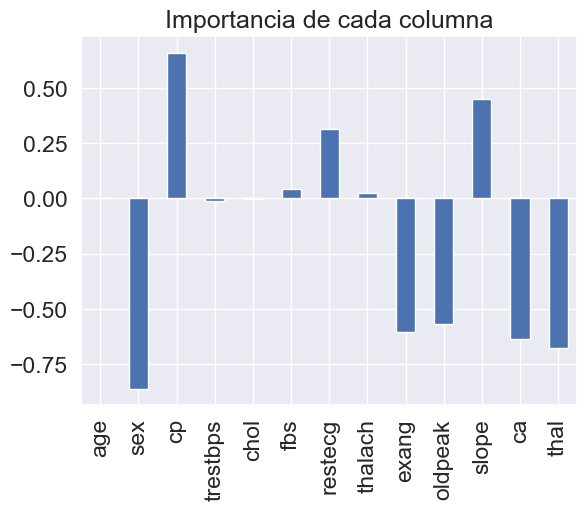

In [73]:
#Visualizamos las feature mas importantes
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Importancia de cada columna", legend=False);

Notarás que algunas son negativas y otras positivas.

Mientras mayor sea el valor (la barra más grande), mayor es la contribución de la característica a la decisión del modelo.

Si el valor es negativo, indica una correlación negativa; si es positivo, indica una correlación positiva.

Por ejemplo, el atributo `sex` tiene un valor negativo de -0.904, lo que significa que a medida que aumenta el valor de `sex`, disminuye el valor de `target`.

Podemos comprobarlo comparando la columna `sex` con la columna `target`.


In [76]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Se puede observar que, cuando `sex` es 0 (mujer), hay casi 3 veces más personas con enfermedad cardíaca (`target` = 1) que sin ella (72 vs. 24).

Luego, cuando `sex` aumenta a 1 (hombre), la proporción se acerca a 1 a 1 (114 vs. 93) entre personas con y sin enfermedad cardíaca.

¿Qué significa esto?

Significa que el modelo ha encontrado un patrón que refleja los datos. Analizando estas cifras y este dataset en particular, parece que si el paciente es mujer, tiene más probabilidades de tener enfermedad cardíaca.

¿Y cómo sería una correlación positiva?


In [77]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Mirando nuevamente el diccionario de datos, vemos que `slope` es la **“pendiente del segmento ST en el pico del ejercicio”**, donde:

* **0: Ascendente (Upsloping)** — mejor frecuencia cardíaca con el ejercicio (poco común)  
* **1: Plana (Flatsloping)** — cambio mínimo (corazón típicamente saludable)  
* **2: Descendente (Downsloping)** — señales de un corazón no saludable  

Según el modelo, hay una correlación positiva de 0.470; no tan fuerte como entre `sex` y `target`, pero aún mayor que 0.

Esta correlación positiva significa que nuestro modelo está detectando el patrón de que a medida que `slope` aumenta, también aumenta el valor de `target`.

¿Es esto cierto?

Al observar el cruce (`pd.crosstab(df["slope"], df["target"])`) lo confirma. A medida que `slope` aumenta, también lo hace `target`.  

¿Qué se puede hacer con esta información?

Esto es algo sobre lo que podrías consultar con un **experto en la materia**.

Podrían interesarse en ver dónde el modelo de machine learning está encontrando más patrones (mayor correlación) y dónde no (menor correlación).

Hacer esto tiene varios beneficios:

1. **Aprender más** — Si algunas correlaciones o importancias de características son confusas, un experto en la materia puede aclarar la situación y ayudarte a entender mejor los datos.  
2. **Redirigir esfuerzos** — Si algunas características aportan mucho más valor que otras, esto puede cambiar la forma en que recolectas datos para distintos problemas.  
3. **Menos pero mejor** — De manera similar, si algunas características aportan mucho más valor que otras, podrías reducir el número de características en las que el modelo busca patrones y mejorar las más importantes. Esto podría ahorrar tiempo de cómputo mientras se mantiene el mismo nivel de desempeño.
